# Exploratory Data Analysis with Python

We will explore the NYC MTA turnstile data set. These data files are from the New York Subway. It tracks the hourly entries and exits to turnstiles (UNIT) by day in the subway system.

Here is an [example of what you could do with the data](https://jameskao.me/analyzing-the-nyc-subway-dataset/). James Kao investigates how subway ridership is affected by incidence of rain.

## Exercise 1

- Download a few [MTA turnstile data files](http://web.mta.info/developers/turnstile.html)
- Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like


        {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
               ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],          
                 ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],  
                ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
              ...   
         ] 
        }

In [18]:
import csv
import datetime
import calendar
import matplotlib.pyplot as plt
import dateutil.parser
from pprint import pprint
from collections import defaultdict

f1 = csv.reader(open("turnstile_161231.txt", 'r'))
f2 = csv.reader(open("turnstile_170107.txt", 'r'))
final_list1 = [[cell.strip() for cell in row] for row in f1] #remove whitespace from beginning and end of string
final_list2 = [[cell.strip() for cell in row] for row in f2]

In [19]:
final_list1 = final_list1[1:len(final_list)]

In [20]:
final_list2 = final_list2[1:len(final_list2)]

In [21]:
# creating dictionary using first 4 elements as key and remaining elements as list of values
mydict = defaultdict(list)
for row in final_list1:
    dictkey = tuple(row[0:4])
    dictvalue = row[4:-1]
    if dictkey in mydict:
        mydict[dictkey].append(dictvalue)
    else:
        mydict[dictkey] = [dictvalue]


In [22]:
pprint(mydict[('R253', 'R181', '00-00-02', '110 ST')][:5])

[['6', 'IRT', '12/24/2016', '03:00:00', 'REGULAR', '0004661223'],
 ['6', 'IRT', '12/24/2016', '07:00:00', 'REGULAR', '0004661237'],
 ['6', 'IRT', '12/24/2016', '11:00:00', 'REGULAR', '0004661301'],
 ['6', 'IRT', '12/24/2016', '15:00:00', 'REGULAR', '0004661442'],
 ['6', 'IRT', '12/24/2016', '19:00:00', 'REGULAR', '0004661636']]


## Exercise 2
- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the cumulative count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the [dateutil](https://dateutil.readthedocs.io/en/stable/) module to convert it into a datetime object.

Your new dict should look something like
 
    {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
                [datetime.datetime(2013, 3, 2, 3, 0), 3788],
                [datetime.datetime(2013, 3, 2, 7, 0), 2585],
                [datetime.datetime(2013, 3, 2, 12, 0), 10653],
                [datetime.datetime(2013, 3, 2, 17, 0), 11016],
                [datetime.datetime(2013, 3, 2, 23, 0), 10666],
                [datetime.datetime(2013, 3, 3, 3, 0), 10814],
                [datetime.datetime(2013, 3, 3, 7, 0), 10229],
                ...
              ],
     ....
     }



In [23]:
# create time series using datetime str and cumulative entries as values
mydict2 = defaultdict(list)

for row in final_list1:
    dict2key = tuple(row[0:4])
    datetime_string = row[6] + ' ' + row[7]
    entries = int(row[9])
    dict2val = [dateutil.parser.parse(datetime_string),entries]
    if dict2key in mydict2:
        mydict2[dict2key].append(dict2val)
    else:
        mydict2[dict2key] = [dict2val]
    


In [24]:
pprint(mydict2[('R253', 'R181', '00-00-02', '110 ST')][:5])

[[datetime.datetime(2016, 12, 24, 3, 0), 4661223],
 [datetime.datetime(2016, 12, 24, 7, 0), 4661237],
 [datetime.datetime(2016, 12, 24, 11, 0), 4661301],
 [datetime.datetime(2016, 12, 24, 15, 0), 4661442],
 [datetime.datetime(2016, 12, 24, 19, 0), 4661636]]


## Exercise 3
- These counts are cumulative every n hours. We want total daily entries. 

Now make it that we again have the same keys, but now we have a single value for a single day, which is not cumulative counts but the total number of passengers that entered through this turnstile on this day.


In [26]:
dict3 = defaultdict(list)
temp_dict = defaultdict(list)

# create dictionary for each turnstile daily with total entry count
# first create temp dictionary with date and append entry cum number
# then create a new value which is max cum number mins min cum number
# assign this value to new key of second dictionary
for row in final_list1:
    temp_key = (row[0],row[1],row[2],row[3], dateutil.parser.parse(row[6])) #creates temporary key with date
    entries = int(row[9])
    temp_dict[temp_key].append(entries)
for k,v in temp_dict.items():
    delta = max(v) - min(v)
    dict3key = k[0:4]
    dict3value = (k[4], delta)
    dict3[dict3key].append(dict3value)


In [27]:
pprint(dict3[('R253', 'R181', '00-00-02', '110 ST')])

[(datetime.datetime(2016, 12, 29, 0, 0), 613),
 (datetime.datetime(2016, 12, 25, 0, 0), 380),
 (datetime.datetime(2016, 12, 27, 0, 0), 679),
 (datetime.datetime(2016, 12, 28, 0, 0), 779),
 (datetime.datetime(2016, 12, 30, 0, 0), 802),
 (datetime.datetime(2016, 12, 24, 0, 0), 571),
 (datetime.datetime(2016, 12, 26, 0, 0), 463)]


In [32]:
dict3_file2 = defaultdict(list)
temp3_file2 = defaultdict(list)

# create dictionary for each turnstile daily with total entry count
# first create temp dictionary with date and append entry cum number
# then create a new value which is max cum number mins min cum number
# assign this value to new key of second dictionary
for row in final_list2:
    temp3_key = (row[0],row[1],row[2],row[3], dateutil.parser.parse(row[6])) #creates temporary key with date
    entries = int(row[9])
    temp3_file2[temp3_key].append(entries)
for k,v in temp3_file2.items():
    delta = max(v) - min(v)
    dict3_file2key = k[0:4]
    dict3_file2value = (k[4], delta)
    dict3_file2[dict3_file2key].append(dict3_file2value)


In [33]:
pprint(dict3[('A002', 'R051', '02-00-00', '59 ST')])

[(datetime.datetime(2016, 12, 27, 0, 0), 1518),
 (datetime.datetime(2016, 12, 29, 0, 0), 1940),
 (datetime.datetime(2016, 12, 28, 0, 0), 2333),
 (datetime.datetime(2016, 12, 24, 0, 0), 1030),
 (datetime.datetime(2016, 12, 30, 0, 0), 2329),
 (datetime.datetime(2016, 12, 26, 0, 0), 1004),
 (datetime.datetime(2016, 12, 25, 0, 0), 427)]


In [34]:
pprint(dict3_file2[('A002', 'R051', '02-00-00', '59 ST')])

[(datetime.datetime(2017, 1, 5, 0, 0), 1702),
 (datetime.datetime(2017, 1, 3, 0, 0), 1715),
 (datetime.datetime(2017, 1, 2, 0, 0), 907),
 (datetime.datetime(2017, 1, 4, 0, 0), 1602),
 (datetime.datetime(2016, 12, 31, 0, 0), 1092),
 (datetime.datetime(2017, 1, 1, 0, 0), 797),
 (datetime.datetime(2017, 1, 6, 0, 0), 1609)]


# Exercise 4
- We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:    

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the notebook.
To plot the time series, import matplotlib with 

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)


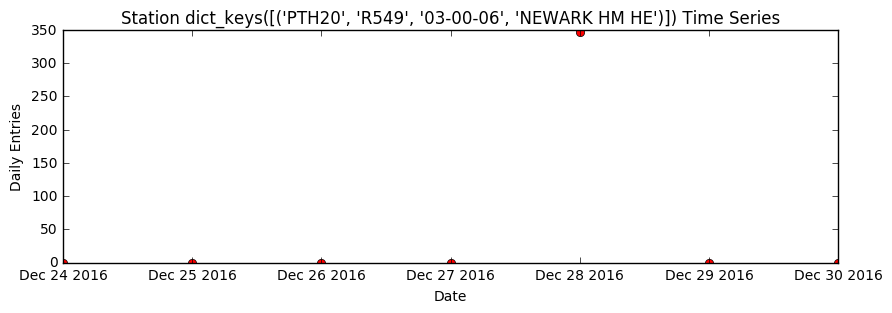

In [35]:
%matplotlib inline

dates = []
counts = []

# take one turnstile and append dates and count from values
firstpair = {k: dict3[k] for k in list(dict3.keys())[:1]}
for v in firstpair.values():
    for date,count in v:
        dates.append(date)
        counts.append(count)
        
plt.figure(figsize=(10,3))
plt.plot(dates, counts, 'ro')
plt.title('Station {} Time Series'.format(firstpair.keys()))
plt.xlabel('Date')
plt.ylabel('Daily Entries')

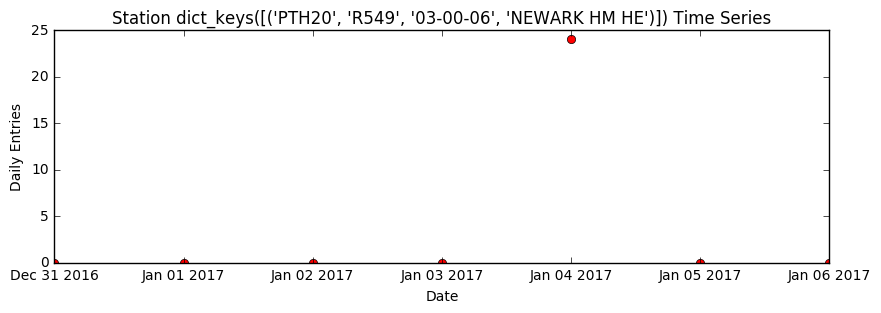

In [36]:
%matplotlib inline

dates2 = []
counts2 = []

# take one turnstile and append dates and count from values
pair2 = {k: dict3_file2[k] for k in list(dict3_file2.keys())[:1]}
for v in pair2.values():
    for date,count in v:
        dates2.append(date)
        counts2.append(count)
        
plt.figure(figsize=(10,3))
plt.plot(dates2, counts2, 'ro')
plt.title('Station {} Time Series'.format(pair2.keys()))
plt.xlabel('Date')
plt.ylabel('Daily Entries')

## Exercise 5
- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.


In [37]:
temp_dict = defaultdict(list)

# new key with ControlArea/Unit/Station and date
for key, value in dict3.items():
    for date, count in value:
        temp_key = (key[0],key[1],key[3],date)
        temp_value = (count)
        temp_dict[temp_key].append(temp_value)
        
# create new dictionary minus date
# value becomes date and entry sum    
dict4 = defaultdict(list)
for key, value in temp_dict.items():
    dict4_key = (key[0],key[1],key[2])
    dict4[dict4_key].append((key[3],sum(value)))

In [38]:
pprint(dict4[('A002', 'R051', '59 ST')])

[(datetime.datetime(2016, 12, 25, 0, 0), 3844),
 (datetime.datetime(2016, 12, 27, 0, 0), 14724),
 (datetime.datetime(2016, 12, 24, 0, 0), 6658),
 (datetime.datetime(2016, 12, 29, 0, 0), 14902),
 (datetime.datetime(2016, 12, 26, 0, 0), 8629),
 (datetime.datetime(2016, 12, 28, 0, 0), 16068),
 (datetime.datetime(2016, 12, 30, 0, 0), 15149)]


In [46]:
temp4_file2 = defaultdict(list)

# new key with ControlArea/Unit/Station and date
for key, value in dict3_file2.items():
    for date, count in value:
        temp4_2key = (key[0],key[1],key[3],date)
        temp4_2value = (count)
        temp4_file2[temp4_2key].append(temp4_2value)
    
# create new dictionary minus date
# value becomes date and entry sum
dict4_file2 = defaultdict(list)
for key, value in temp4_file2.items():
    dict4_file2key = (key[0],key[1],key[2])
    dict4_file2[dict4_file2key].append((key[3],sum(value)))

In [49]:
pprint(dict4_file2[('A002', 'R051', '59 ST')])

[(datetime.datetime(2017, 1, 5, 0, 0), 15345),
 (datetime.datetime(2017, 1, 4, 0, 0), 15162),
 (datetime.datetime(2017, 1, 3, 0, 0), 14746),
 (datetime.datetime(2017, 1, 1, 0, 0), 5990),
 (datetime.datetime(2017, 1, 6, 0, 0), 14709),
 (datetime.datetime(2017, 1, 2, 0, 0), 7685),
 (datetime.datetime(2016, 12, 31, 0, 0), 7509)]


## Exercise 6
- Similarly, combine everything in each station, and come up with a time series of `[(date1, count1),(date2,count2),...]` type of time series for each STATION, by adding up all the turnstiles in a station.

In [50]:
temp_dict = defaultdict(list)

# create temp key with date added and setting value to the count
for key, value in dict4.items():
    for date, count in value:
        temp_key = (key[2],date)
        temp_value = (count)
        temp_dict[temp_key].append(temp_value)

# bring back to original dictionary with station only
# value becomes date and sum of entries
dict5 = defaultdict(list)
for key, value in temp_dict.items():
    dict5key = (key[0])
    dict5[dict5key].append((key[1], sum(value)))

pprint(dict5)

defaultdict(<class 'list'>,
            {'1 AV': [(datetime.datetime(2016, 12, 24, 0, 0), 8173),
                      (datetime.datetime(2016, 12, 26, 0, 0), 8243),
                      (datetime.datetime(2016, 12, 30, 0, 0), 17865),
                      (datetime.datetime(2016, 12, 27, 0, 0), 14492),
                      (datetime.datetime(2016, 12, 25, 0, 0), 5489),
                      (datetime.datetime(2016, 12, 29, 0, 0), 16649),
                      (datetime.datetime(2016, 12, 28, 0, 0), 16268)],
             '103 ST': [(datetime.datetime(2016, 12, 29, 0, 0), 25270),
                        (datetime.datetime(2016, 12, 30, 0, 0), 26423),
                        (datetime.datetime(2016, 12, 24, 0, 0), 15648),
                        (datetime.datetime(2016, 12, 26, 0, 0), 15961),
                        (datetime.datetime(2016, 12, 27, 0, 0), 23653),
                        (datetime.datetime(2016, 12, 25, 0, 0), 11203),
                        (datetime.datetime(2016, 12,

In [52]:
temp_dict = defaultdict(list)

# create temp key with date added and setting value to the count
for key, value in dict4_file2.items():
    for date, count in value:
        temp_key = (key[2],date)
        temp_value = (count)
        temp_dict[temp_key].append(temp_value)
# bring back to original dictionary with station only
# value becomes date and sum of entries
dict5_file2 = defaultdict(list)
for key, value in temp_dict.items():
    dict5_2key = (key[0])
    dict5_file2[dict5_2key].append((key[1], sum(value)))

pprint(dict5_file2)

defaultdict(<class 'list'>,
            {'1 AV': [(datetime.datetime(2017, 1, 2, 0, 0), 11171),
                      (datetime.datetime(2017, 1, 3, 0, 0), 20162),
                      (datetime.datetime(2016, 12, 31, 0, 0), 13745),
                      (datetime.datetime(2017, 1, 4, 0, 0), 21119),
                      (datetime.datetime(2017, 1, 6, 0, 0), 21854),
                      (datetime.datetime(2017, 1, 1, 0, 0), 9732),
                      (datetime.datetime(2017, 1, 5, 0, 0), 21559)],
             '103 ST': [(datetime.datetime(2017, 1, 5, 0, 0), 30924),
                        (datetime.datetime(2017, 1, 4, 0, 0), 30312),
                        (datetime.datetime(2017, 1, 6, 0, 0), 27388),
                        (datetime.datetime(2017, 1, 2, 0, 0), 16384),
                        (datetime.datetime(2016, 12, 31, 0, 0), 17846),
                        (datetime.datetime(2017, 1, 3, 0, 0), 28492),
                        (datetime.datetime(2017, 1, 1, 0, 0), 13531)],
 

## Exercise 7
- Plot the time series for a station

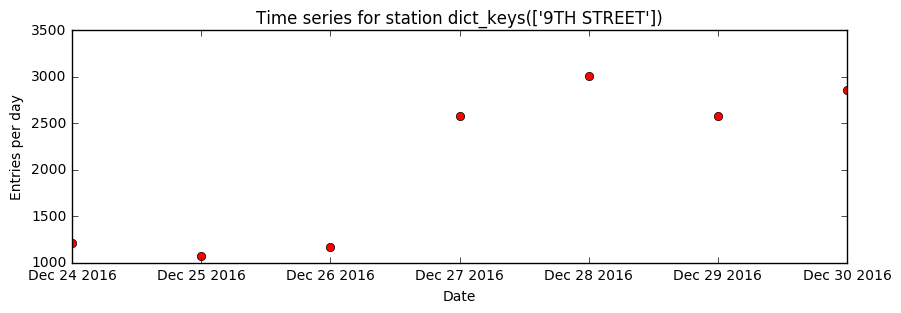

In [107]:
# create date count dictionary for one station from the 12/31/16 data
dates = []
counts = []
firstpair = {k: dict5[k] for k in list(dict5.keys())[:1]} #choose one station with key/value
firstweek_key = firstpair.keys()
for tup in firstpair.values():
    for date, count in tup:
        dates.append(date)
        counts.append(count)

plt.figure(figsize=(10,3))
plt.plot(dates, counts, 'ro')
plt.title('Time series for station {}'.format(firstpair.keys()))
plt.xlabel('Date')
plt.ylabel('Entries per day')

In [116]:
firstpair = 

{'9TH STREET': [(datetime.datetime(2016, 12, 26, 0, 0), 1170),
  (datetime.datetime(2016, 12, 24, 0, 0), 1215),
  (datetime.datetime(2016, 12, 30, 0, 0), 2857),
  (datetime.datetime(2016, 12, 29, 0, 0), 2579),
  (datetime.datetime(2016, 12, 25, 0, 0), 1071),
  (datetime.datetime(2016, 12, 27, 0, 0), 2576),
  (datetime.datetime(2016, 12, 28, 0, 0), 3005)]}

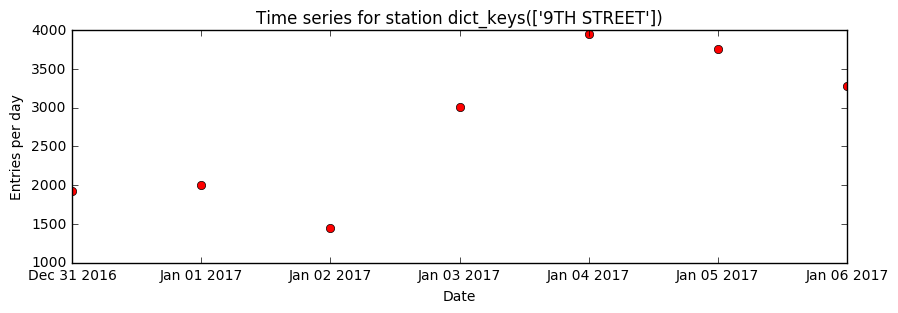

In [117]:
# create date count dictionary for one station from the 12/31/16 data
dates2 = []
counts2 = []

firstpair2 = {k: dict5_file2[k] for k in dict5_file2 if k == '9TH STREET'} #choose one station with key/value
for tup in firstpair2.values():
    for date, count in tup:
        dates2.append(date)
        counts2.append(count)

plt.figure(figsize=(10,3))
plt.plot(dates2, counts2, 'ro')
plt.title('Time series for station {}'.format(firstpair2.keys()))
plt.xlabel('Date')
plt.ylabel('Entries per day')

## Exercise 8
- Make one list of counts for **one** week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another week.
`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.



([<matplotlib.axis.XTick at 0x122876d30>,
 <a list of 7 Text xticklabel objects>)

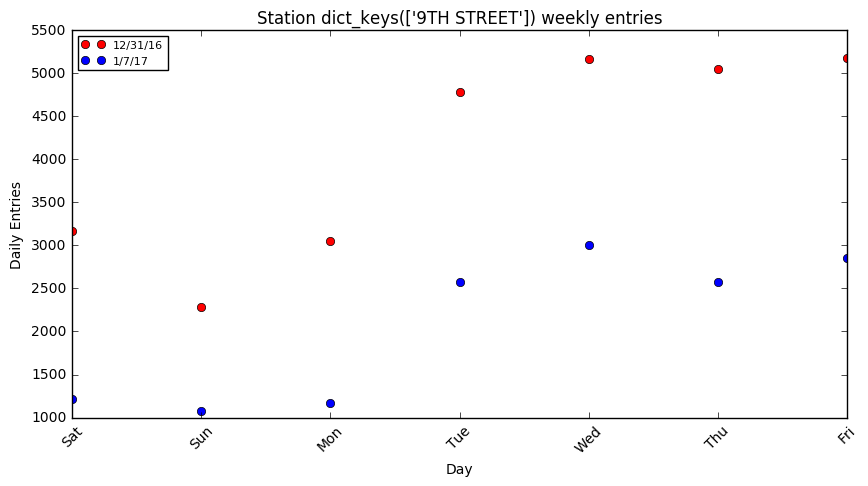

In [118]:
weekcount_lst = []

# need key:value pairs for one station in 1 week, then apply to multiple weeks
firstweek = {k: dict5[k] for k in list(dict5.keys())[:1]}
firstweek_key = firstweek.keys()

# obtain 2nd week key:value pair based on key of the first week
secondweek = {firstweek_key: dict5_file2[firstweek_key] for firstweek_key in dict5_file2.keys()}

# iterate through each day in each week and append the daily ridership
for pairs in firstweek, secondweek:
    temp_dict = defaultdict(list)
    for datecount_pair in pairs.values():
        for date,count in datecount_pair:
            temp_dict[date] = count
    for key in sorted(temp_dict):
        weekcount_lst.append(temp_dict[key])
        
# multiple weeks split
weekcount_lst1 = weekcount_lst[:7]
weekcount_lst2 = weekcount_lst[7:14]

plt.figure(figsize=(10,5))
plt.plot(weekcount_lst2 , 'ro', label='12/31/16')
plt.plot(weekcount_lst1, 'bo', label='1/7/17')
plt.title('Station {} weekly entries'.format(firstweek.keys()))
plt.xlabel('Day')
plt.ylabel('Daily Entries')
plt.legend(loc=2, prop={'size':8})

x = [0,1,2,3,4,5,6]
days = ['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
plt.xticks(x, days, rotation=45)


In [49]:
pprint(weekcount_lst)

[5344,
 3873,
 5268,
 11808,
 12887,
 12480,
 12450,
 5237,
 3239,
 5673,
 9769,
 10046,
 9546,
 9874]


## Exercise 9
- Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [128]:
dict5['GRD CNTRL-42 ST']

[(datetime.datetime(2016, 12, 30, 0, 0), 112058),
 (datetime.datetime(2016, 12, 28, 0, 0), 125408),
 (datetime.datetime(2016, 12, 29, 0, 0), 117689),
 (datetime.datetime(2016, 12, 24, 0, 0), 37659),
 (datetime.datetime(2016, 12, 27, 0, 0), 113222),
 (datetime.datetime(2016, 12, 26, 0, 0), 54999),
 (datetime.datetime(2016, 12, 25, 0, 0), 29869)]

In [129]:
dict5_file2['GRD CNTRL-42 ST']

[(datetime.datetime(2017, 1, 4, 0, 0), 149522),
 (datetime.datetime(2017, 1, 1, 0, 0), 38217),
 (datetime.datetime(2017, 1, 2, 0, 0), 47430),
 (datetime.datetime(2016, 12, 31, 0, 0), 55247),
 (datetime.datetime(2017, 1, 5, 0, 0), 152447),
 (datetime.datetime(2017, 1, 3, 0, 0), 150486),
 (datetime.datetime(2017, 1, 6, 0, 0), 145197)]

In [123]:
# create combined dictionary
large_dict = defaultdict(list)
both_dict = [dict5, dict5_file2]

# large dictionary with date and entry for all weeks
# iterate through each dictionary and append total rides
for d in both_dict:
    for k,v in d.items():
        for pair in v:
            large_dict[k].append(pair)


large_dict2 = defaultdict(list)

# iterate through the new dictionary and create station, entries by day
for k,v in large_dict.items():
    for pair in v:
        large_dict2[k].append(pair[1])
        
# summing entries for the week in the latest dictionary
for k,v in large_dict2.items():
    large_dict2[k] = sum(v)

# sorting by total number of entries
sorted_pairs = (sorted(large_dict2.items(), key=lambda x: x[1], reverse=True))

pprint(sorted_pairs)

[('5 AVE', 986116510),
 ('OCEAN PKWY', 111573591),
 ('CANAL ST', 97639056),
 ('34 ST-PENN STA', 68221301),
 ('96 ST', 67729722),
 ('225 ST', 12069780),
 ('FLUSHING-MAIN', 4570780),
 ('THIRTY THIRD ST', 2164457),
 ('GRD CNTRL-42 ST', 1329450),
 ('34 ST-HERALD SQ', 1325021),
 ('42 ST-PORT AUTH', 1059180),
 ('TIMES SQ-42 ST', 989294),
 ('23 ST', 978841),
 ('86 ST', 975637),
 ('JOURNAL SQUARE', 905988),
 ('FULTON ST', 858919),
 ('14 ST-UNION SQ', 844026),
 ('125 ST', 768914),
 ('59 ST', 746881),
 ('47-50 STS ROCK', 699581),
 ('59 ST COLUMBUS', 677741),
 ('SOUTH FERRY', 560108),
 ('14 ST', 547035),
 ('50 ST', 531545),
 ('JKSN HT-ROOSVLT', 525680),
 ('PAVONIA/NEWPORT', 517766),
 ('CHAMBERS ST', 511973),
 ('72 ST', 447972),
 ('ATL AV-BARCLAY', 431442),
 ('42 ST-BRYANT PK', 406728),
 ('28 ST', 404190),
 ('JAMAICA CENTER', 386659),
 ('LEXINGTON AV/53', 382555),
 ('145 ST', 375727),
 ('8 AV', 367289),
 ('WALL ST', 364803),
 ('CHURCH AV', 363181),
 ('JAY ST-METROTEC', 361233),
 ('GRAND ST', 34583

## Exercise 10
- Make a single list of these total ridership values and plot it with `plt.hist(total_ridership_counts)` to get an idea about the distribution of total ridership among different stations.   
This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

*Additional Hint*:    
If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a `plt.bar` graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be `0,1,2,3,...`, so you can do 

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

    

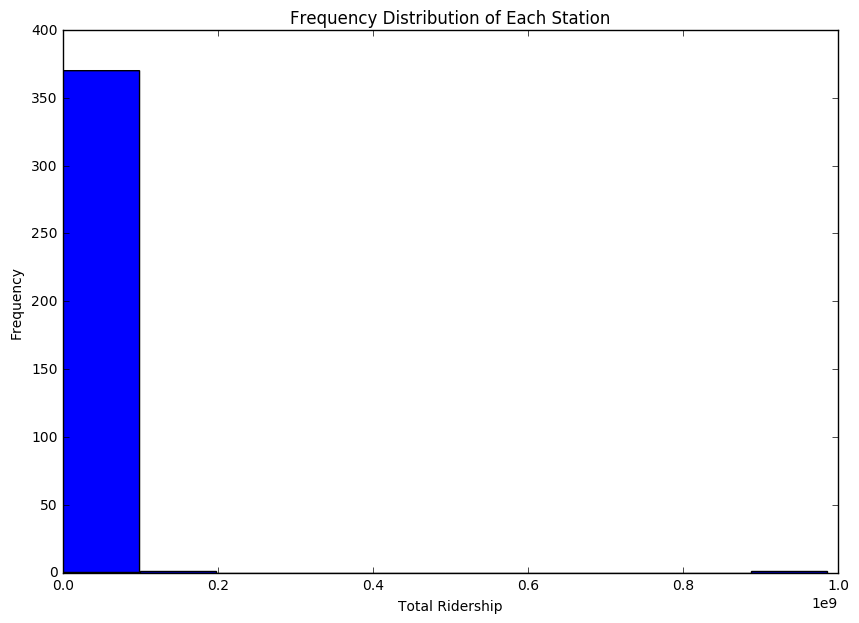

In [121]:
single_list = []
total_riders = []

for pair in sorted_pairs:
    single_list.append(pair[0]) #stations into list
    total_riders.append(pair[1]) #total ridership for each station
    
plt.figure(figsize=(10,7))
plt.hist(total_riders)
plt.title('Frequency Distribution of Each Station')
plt.xlabel('Total Ridership')
plt.ylabel('Frequency')